In [1]:
import pandas as pd
import numpy as np
import itertools    
import matplotlib.pyplot as plt
import time
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder,scale,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('IPM Jatim 2016.xlsx')
df.head()

,Daerah,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka,IPM
0,Pacitan,19.56,58.94,1,91.54,68.71,15.49,5.21,5.21,1.00,65.74
1,Ponorogo,21.55,60.14,5,89.74,83.53,11.75,5.29,5.29,3.94,68.93
2,Trenggalek,18.01,57.45,1,94.32,70.44,13.24,5.00,5.00,3.07,67.78
3,Tulungagung,18.67,59.07,9,96.88,76.24,8.23,5.02,5.02,3.60,70.82
4,Blitar,20.49,57.72,7,93.56,67.06,9.88,5.08,5.08,2.92,68.88


In [3]:
print("Number of null values:", df.isnull().sum())

Number of null values: Daerah                  0
AKB                     0
Keluhan Kesehatan       0
Sarana Kesehatan        0
Angka Melek Huruf       0
APS-SMA                 0
Persentase Miskin       0
PDRB                    0
Pertumbuhan Ekonomi     0
Pengangguran Terbuka    0
IPM                     0
dtype: int64


In [4]:
print("Dimension of the original data:", df.shape)

df_clean = df.dropna().drop(['Daerah'], axis=1)
print("Dimension of modified data :", df_clean.shape)


Dimension of the original data: (38, 11)
Dimension of modified data : (38, 10)


In [5]:
kw = df_clean.copy()

In [6]:
corr_matrix = kw.corr()
corr_matrix

,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka,IPM
AKB,1.000000,-0.259591,-0.257464,-0.772463,-0.776740,0.640973,-0.059058,-0.059058,-0.185607,-0.725439
Keluhan Kesehatan,-0.259591,1.000000,0.015062,0.214236,0.024450,-0.111547,0.230477,0.230477,-0.285351,0.063606
Sarana Kesehatan,-0.257464,0.015062,1.000000,0.405946,0.265254,-0.379024,0.153567,0.153567,0.456344,0.448965
Angka Melek Huruf,-0.772463,0.214236,0.405946,1.000000,0.647112,-0.867472,0.135767,0.135767,0.415984,0.857822
APS-SMA,-0.776740,0.024450,0.265254,0.647112,1.000000,-0.596427,0.122694,0.122694,0.377336,0.748227
Persentase Miskin,0.640973,-0.111547,-0.379024,-0.867472,-0.596427,1.000000,-0.091843,-0.091843,-0.380596,-0.829183
PDRB,-0.059058,0.230477,0.153567,0.135767,0.122694,-0.091843,1.000000,1.000000,0.107270,0.068316
Pertumbuhan Ekonomi,-0.059058,0.230477,0.153567,0.135767,0.122694,-0.091843,1.000000,1.000000,0.107270,0.068316
Pengangguran Terbuka,-0.185607,-0.285351,0.456344,0.415984,0.377336,-0.380596,0.107270,0.107270,1.000000,0.487293
IPM,-0.725439,0.063606,0.448965,0.857822,0.748227,-0.829183,0.068316,0.068316,0.487293,1.000000


<Axes: >

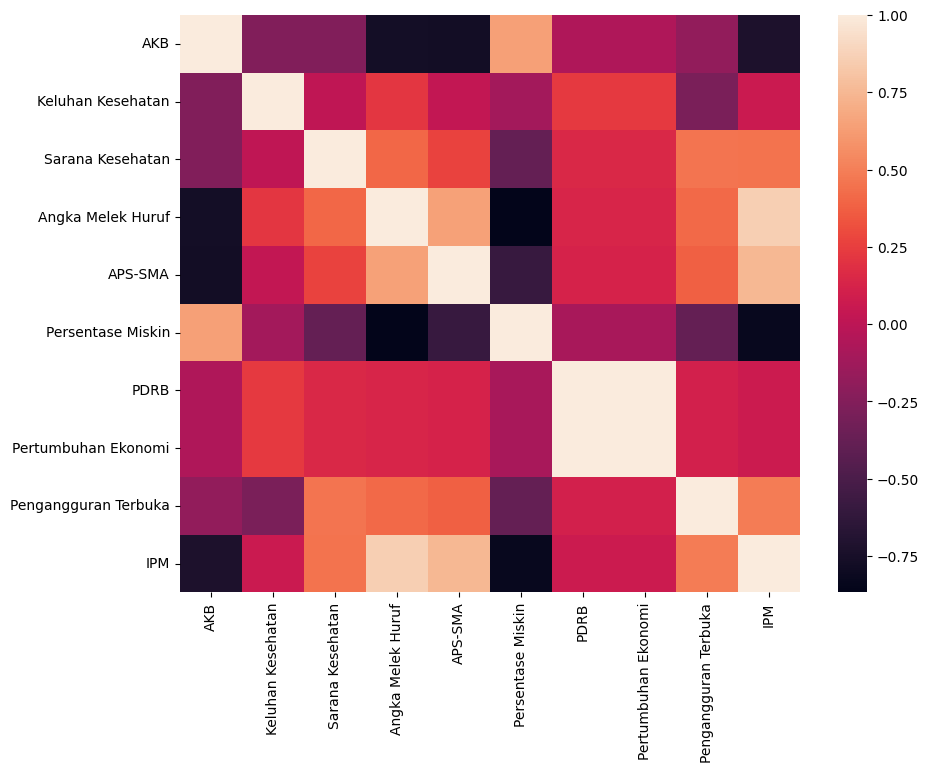

In [7]:
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)

Text(0.5, 1.0, 'Correlation Plot')

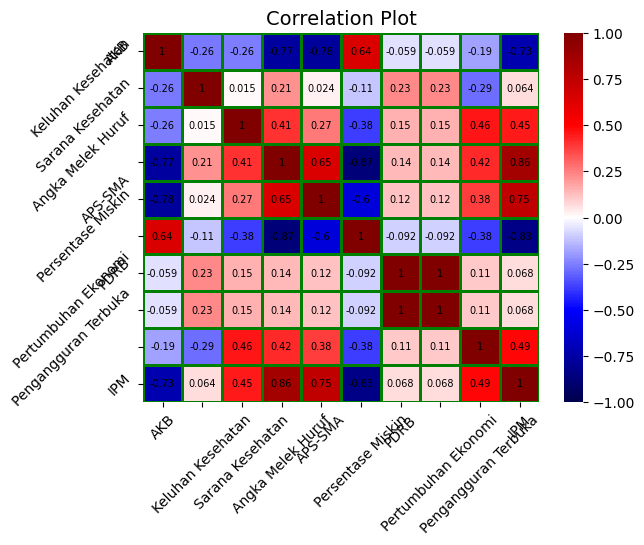

In [8]:
sns.heatmap(corr_matrix, 
            cmap = 'seismic', 
            linewidth = 0.75,
            linecolor = 'green',
            cbar = True,
            vmin = -1,
            vmax = 1,
            annot = True,
            annot_kws = {'size': 7,'color':'black'})
plt.tick_params(labelsize = 10, rotation = 45)
plt.title('Correlation Plot',size = 14)

In [ ]:
y = df_clean['IPM']  
X = df_clean.drop(['IPM'], axis=1)  
X.head()

,AKB,Keluhan Kesehatan,Sarana Kesehatan,Angka Melek Huruf,APS-SMA,Persentase Miskin,PDRB,Pertumbuhan Ekonomi,Pengangguran Terbuka
0,19.56,58.94,1,91.54,68.71,15.49,5.21,5.21,1.00
1,21.55,60.14,5,89.74,83.53,11.75,5.29,5.29,3.94
2,18.01,57.45,1,94.32,70.44,13.24,5.00,5.00,3.07
3,18.67,59.07,9,96.88,76.24,8.23,5.02,5.02,3.60
4,20.49,57.72,7,93.56,67.06,9.88,5.08,5.08,2.92


In [46]:
def processsubset(featureset):
    model = sm.OLS(y,X[list(featureset)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(featureset)])-y)**2).sum()
    return {"model":regr,"RSS":RSS}

In [11]:
def getbest(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns,k):
        results.append(processsubset(combo))
    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed", models.shape[0], k, "predictors in", toc-tic, "seconds")
   
    return best_model

In [12]:
model_best = pd.DataFrame(columns = ["RSS","model"])

tic = time.time()
for i in range(1,10):
    model_best.loc[i] = getbest(i)
toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 1 predictors in 0.07582807540893555 seconds
Processed 36 2 predictors in 0.15511178970336914 seconds
Processed 84 3 predictors in 0.3127460479736328 seconds
Processed 126 4 predictors in 0.5693204402923584 seconds
Processed 126 5 predictors in 0.3854360580444336 seconds
Processed 84 6 predictors in 0.2459700107574463 seconds
Processed 36 7 predictors in 0.10700559616088867 seconds
Processed 9 8 predictors in 0.027080059051513672 seconds
Processed 1 9 predictors in 0.004475593566894531 seconds
Total elapsed time : 1.91766357421875 seconds


In [13]:
model_best

,RSS,model
1,285.549923,<statsmodels.regression.linear_model.Regressio...
2,215.272521,<statsmodels.regression.linear_model.Regressio...
3,205.45137,<statsmodels.regression.linear_model.Regressio...
4,198.869965,<statsmodels.regression.linear_model.Regressio...
5,191.708199,<statsmodels.regression.linear_model.Regressio...
6,185.236293,<statsmodels.regression.linear_model.Regressio...
7,184.015644,<statsmodels.regression.linear_model.Regressio...
8,184.007534,<statsmodels.regression.linear_model.Regressio...
9,184.007534,<statsmodels.regression.linear_model.Regressio...


In [14]:
print(model_best.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.555e+04
Date:                Sun, 16 Mar 2025   Prob (F-statistic):                    1.37e-53
Time:                        23:40:11   Log-Likelihood:                         -86.872
No. Observations:                  38   AIC:                                      177.7
Df Residuals:                      36   BIC:                                      181.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [15]:
print(model_best.loc[2,"model"].rsquared)

0.9988436315655067


In [16]:
model_best.apply(lambda row:row[1].rsquared, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_11652\3471709294.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_best.apply(lambda row:row[1].rsquared, axis=1)


1    0.998466
2    0.998844
3    0.998896
4    0.998932
5    0.998970
6    0.999005
7    0.999012
8    0.999012
9    0.999012
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_11652\2708560098.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rsquared_adj = model_best.apply(lambda row: row[1].rsquared_adj, axis=1)
C:\Users\user\AppData\Local\Temp\ipykernel_11652\2708560098.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aic = model_best.apply(lambda row: row[1].aic, axis=1)
C:\Users\user\AppData\Local\Temp\ipykernel_11652\2708560098.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

Text(0, 0.5, 'BIC')

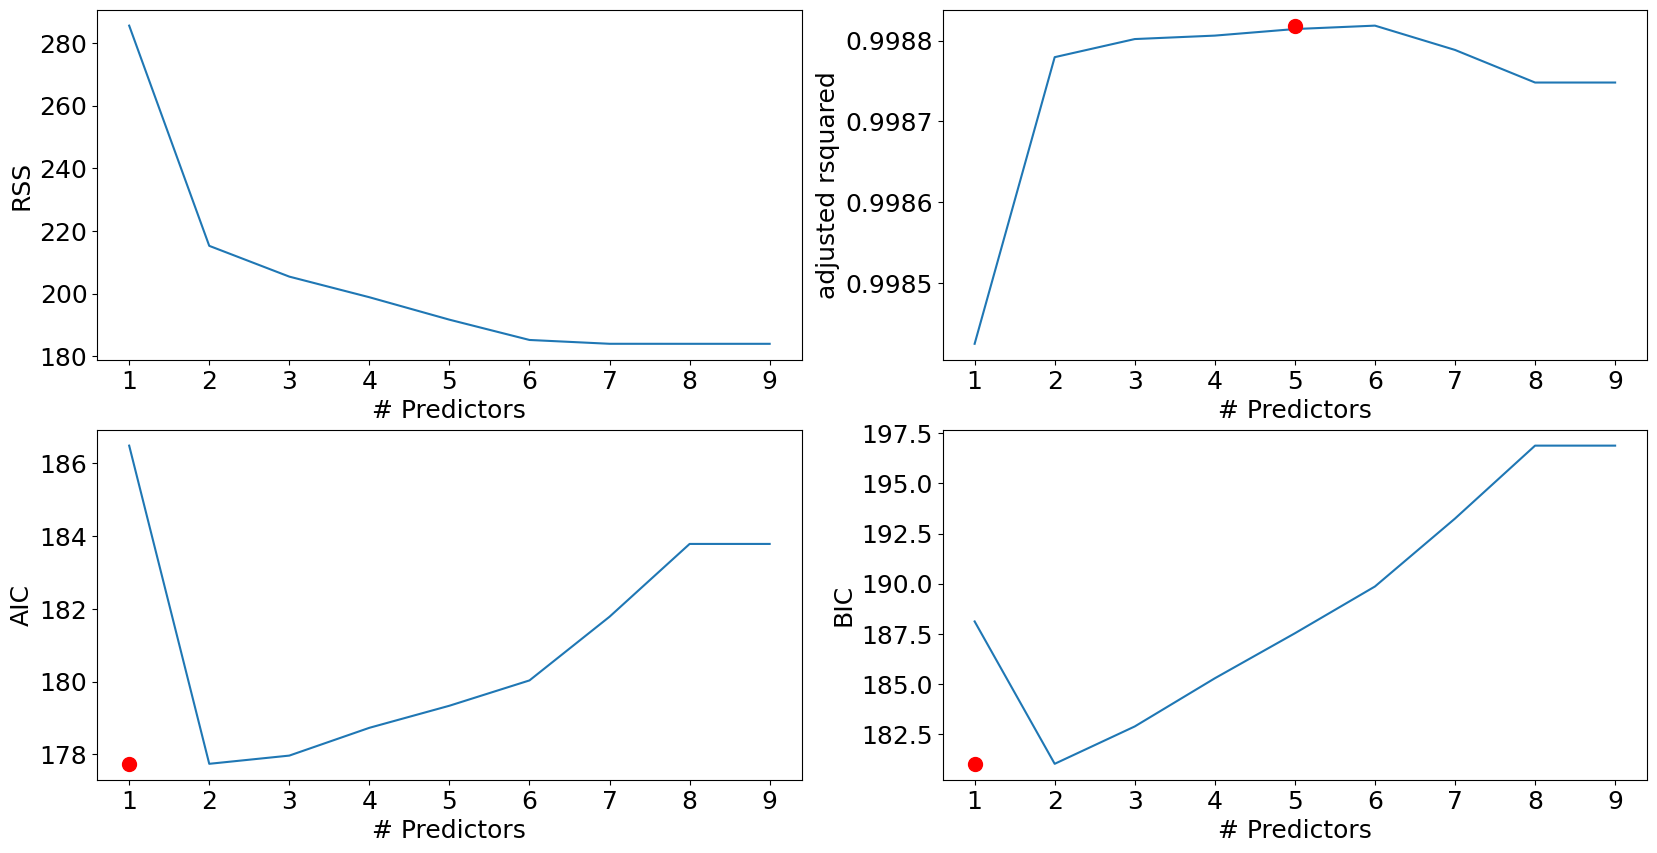

In [17]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18,'lines.markersize':10})

plt.subplot(2,2,1)

plt.plot(model_best["RSS"])
plt.xlabel("# Predictors")
plt.ylabel("RSS")

rsquared_adj = model_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2,2,2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('adjusted rsquared')

aic = model_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2,2,3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('AIC')

bic = model_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2,2,4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), 'or')
plt.xlabel("# Predictors")
plt.ylabel('BIC')



# FORWARD STEPWISE

In [18]:
def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processsubset(predictors+[p]))

    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()

    print("Processed", models.shape[0], "predictors in", toc-tic, "seconds")

    return best_model

In [19]:
models_fwd = pd.DataFrame(columns = ["RSS","model"])

tic = time.time()
predictors = []

for i in range(1, len(X.columns)+1):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 predictors in 0.05890774726867676 seconds
Processed 8 predictors in 0.036394357681274414 seconds
Processed 7 predictors in 0.04642343521118164 seconds
Processed 6 predictors in 0.029082298278808594 seconds
Processed 5 predictors in 0.025264739990234375 seconds
Processed 4 predictors in 0.021344661712646484 seconds
Processed 3 predictors in 0.023325681686401367 seconds
Processed 2 predictors in 0.014719009399414062 seconds
Processed 1 predictors in 0.005360126495361328 seconds
Total elapsed time : 0.29317378997802734 seconds


In [20]:
print(models_fwd.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.555e+04
Date:                Sun, 16 Mar 2025   Prob (F-statistic):                    1.37e-53
Time:                        23:40:12   Log-Likelihood:                         -86.872
No. Observations:                  38   AIC:                                      177.7
Df Residuals:                      36   BIC:                                      181.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [21]:
print(model_best.loc[2]["model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                    IPM   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.555e+04
Date:                Sun, 16 Mar 2025   Prob (F-statistic):                    1.37e-53
Time:                        23:40:12   Log-Likelihood:                         -86.872
No. Observations:                  38   AIC:                                      177.7
Df Residuals:                      36   BIC:                                      181.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# BACKWARD


In [22]:
def backward(predictors):
    tic = time.time()

    results = []

    for combo in itertools.combinations(predictors,len(predictors)-1):
        results.append(processsubset(combo))
    models = pd.DataFrame(results)

    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print('Processed',models.shape[0],'models on',len(predictors)-1, 'predictors in',toc-tic,'seconds')

    return best_model

In [23]:
models_bwd = pd.DataFrame(columns = ["RSS","model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]['model'].model.exog_names
toc = time.time()
print("Total elapsed time :",(toc-tic),"seconds")

Processed 9 models on 8 predictors in 0.04552435874938965 seconds
Processed 8 models on 7 predictors in 0.028574466705322266 seconds
Processed 7 models on 6 predictors in 0.0265047550201416 seconds
Processed 6 models on 5 predictors in 0.028411388397216797 seconds
Processed 5 models on 4 predictors in 0.023420333862304688 seconds
Processed 4 models on 3 predictors in 0.029214143753051758 seconds
Processed 3 models on 2 predictors in 0.02072763442993164 seconds
Processed 2 models on 1 predictors in 0.017250776290893555 seconds
Total elapsed time : 0.23064589500427246 seconds


In [24]:
print("BEST SUBSET")
print(model_best.loc[7,'model'].params)

BEST SUBSET
AKB                     0.079231
Sarana Kesehatan        0.064187
Angka Melek Huruf       0.612526
APS-SMA                 0.171870
Persentase Miskin      -0.110171
PDRB                   -0.147649
Pengangguran Terbuka    0.142014
dtype: float64


In [25]:
print("FORWARD SELECTION")
print(models_fwd.loc[7,'model'].params)

FORWARD SELECTION
Angka Melek Huruf       0.612526
APS-SMA                 0.171870
Pengangguran Terbuka    0.142014
PDRB                   -0.147649
Sarana Kesehatan        0.064187
AKB                     0.079231
Persentase Miskin      -0.110171
dtype: float64


In [26]:
print("BACKWARD SELECTION")
print(models_bwd.loc[7,'model'].params)

BACKWARD SELECTION
AKB                     0.079231
Sarana Kesehatan        0.064187
Angka Melek Huruf       0.612526
APS-SMA                 0.171870
Persentase Miskin      -0.110171
PDRB                   -0.147649
Pengangguran Terbuka    0.142014
dtype: float64


# RIDGE REGRESSION


In [27]:
df = pd.read_excel('IPM JATIM 2016.xlsx').dropna().drop('Daerah', axis = 1)

In [28]:
y = df['IPM']
X = df.drop(['IPM'], axis = 1).astype('float64')

In [29]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisasi fitur

In [ ]:
ridge = Ridge()  
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_scaled, y) 
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 9)

Text(0, 0.5, 'weights')

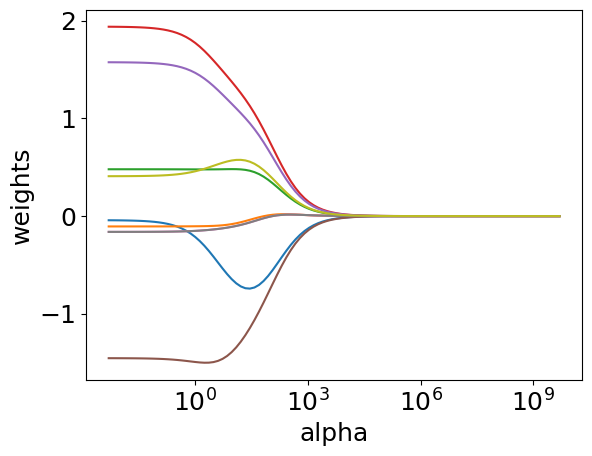

In [32]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=1)

# Normalisasi hanya berdasarkan X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

In [ ]:
ridge2 = Ridge(alpha=4)  # Hapus normalize=True
ridge2.fit(X_train_scaled, y_train)  
pred2 = ridge2.predict(X_test_scaled)  

print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

AKB                    -0.451789
Keluhan Kesehatan       0.269979
Sarana Kesehatan        0.888106
Angka Melek Huruf       0.772946
APS-SMA                 0.506562
Persentase Miskin      -0.202292
PDRB                    0.560133
Pertumbuhan Ekonomi     0.560133
Pengangguran Terbuka    0.657927
dtype: float64
127.21273098157862


In [47]:
ridge3 = Ridge(alpha=10**10)  
ridge3.fit(X_train_scaled, y_train)  
pred3 = ridge3.predict(X_test_scaled)  

# Print koefisien regresi
print(pd.Series(ridge3.coef_, index=X.columns))

# Hitung Mean Squared Error (MSE)
print(mean_squared_error(y_test, pred3))

AKB                    -4.574384e-09
Keluhan Kesehatan       1.741117e-09
Sarana Kesehatan        4.547217e-09
Angka Melek Huruf       5.965424e-09
APS-SMA                 5.495839e-09
Persentase Miskin      -4.965905e-09
PDRB                    5.531277e-09
Pertumbuhan Ekonomi     5.531277e-09
Pengangguran Terbuka    3.761148e-09
dtype: float64
40.96549323851151


In [ ]:
ridge2 = Ridge(alpha=4)  # Hapus normalize=True
ridge2.fit(X_train_scaled, y_train)  
pred = ridge2.predict(X_test_scaled)  
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred2))

AKB                    -0.451789
Keluhan Kesehatan       0.269979
Sarana Kesehatan        0.888106
Angka Melek Huruf       0.772946
APS-SMA                 0.506562
Persentase Miskin      -0.202292
PDRB                    0.560133
Pertumbuhan Ekonomi     0.560133
Pengangguran Terbuka    0.657927
dtype: float64
127.21273098157862


In [37]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_scaled, y_train)

# Cek alpha terbaik
ridgecv.alpha_

np.float64(21.643806405415308)

In [ ]:
ridge4 = Ridge(alpha=ridgecv.alpha_)  
ridge4.fit(X_train_scaled, y_train)

# Hitung MSE pada data test
mse = mean_squared_error(y_test, ridge4.predict(X_test_scaled))
print("Mean Squared Error:", mse)

Mean Squared Error: 94.64734665694164


In [39]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AKB                    -0.006203
Keluhan Kesehatan      -0.022787
Sarana Kesehatan        0.074316
Angka Melek Huruf       0.341968
APS-SMA                 0.134386
Persentase Miskin      -0.299273
PDRB                   -0.052786
Pertumbuhan Ekonomi    -0.052786
Pengangguran Terbuka    0.198605
dtype: float64

# LASSO REGRESSION

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
# Lasso Regression tanpa normalize=True
lasso = Lasso(max_iter=10000)

coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'weights')

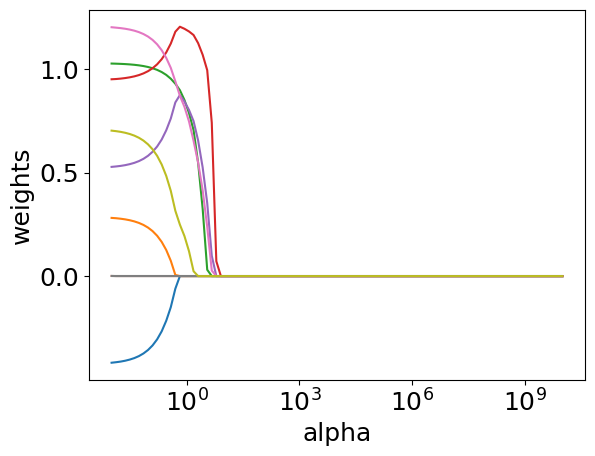

In [42]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# LASSO CV

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(X_train_scaled, y_train)

# Gunakan alpha terbaik dari LassoCV
lasso = Lasso(alpha=lassocv.alpha_, max_iter=100000)
lasso.fit(X_train_scaled, y_train)

# Hitung MSE pada data test
mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))
print("Mean Squared Error:", mse)

Mean Squared Error: 62.147680644750764


In [45]:
pd.Series(lasso.coef_, index=X.columns)

AKB                    -0.000000e+00
Keluhan Kesehatan       0.000000e+00
Sarana Kesehatan        7.627253e-01
Angka Melek Huruf       1.176315e+00
APS-SMA                 7.861584e-01
Persentase Miskin      -0.000000e+00
PDRB                    7.188537e-01
Pertumbuhan Ekonomi     2.804774e-16
Pengangguran Terbuka    9.088979e-02
dtype: float64

# Mengecek Intercept masing" model

In [48]:
lasso_intercept = lasso.intercept_
print("Intercept Lasso:", lasso_intercept)

Intercept Lasso: 69.13947368421051


In [49]:
ridge_intercept = ridge4.intercept_
print("Intercept Ridge:", ridge_intercept)

Intercept Ridge: 32.954451659613476
